# Evolution des kills en fonction des bans
### Existance d'un lien ou non 


In [1]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_reader = "../Data/killsv2.csv"
path_patchnote = "../Data/PatchNoteBD.csv"
path_ban = "../Data/bans_rework.csv"


In [2]:

df_kills = pd.read_csv(path_reader)
df_patchNotes = pd.read_csv(path_patchnote)
df_bans = pd.read_csv(path_ban)

df_kills.Date = pd.to_datetime(df_kills.Date)
df_bans.Date = pd.to_datetime(df_bans.Date)



In [3]:
df_kills.Date.min()

Timestamp('2014-09-09 00:00:00')

In [4]:
df_kills.Date.max()

Timestamp('2018-01-29 00:00:00')

In [5]:
df_patchNotes[~df_patchNotes.NvxPersonnage.isna()]

,Date,Version,NvxPersonnage,Other,Rework
2,September 10 2014,V4.16,Azir,NaN,NaN
4,August 13 2014,V4.14,Gnar,NaN,NaN
11,May 8 2014,V4.7,Braum,Balance changes for Jarvan IV Kha'Zix ...,NaN
15,February 27 2014,V4.3,Vel'Koz,Fear reworked into Flee.,NaN
19,October 14 2015,V5.20,Kindred,NaN,NaN
26,July 8 2015,V5.13,Tahm Kench,Sated Devourer added. Various balance changes.,NaN
29,May 28 2015,V5.10,Ekko,Karma Gameplay Update,NaN
34,March 12 2015,V5.5,Bard,NaN,NaN
40,October 5 2016,V6.20,Ivern,NaN,NaN
44,August 10 2016,V6.16,Kled,NaN,NaN


In [6]:
# import calendar

# d= dict(enumerate(calendar.month_name))
# df_patchNotes.Date = df_patchNotes.Date.map(d)

In [7]:
df_bans[(df_bans.Date > "2016/1/28") & (df_bans.Date < "2016/10/5")]

,Unnamed: 0,Champions,ban_pos,TeamBan,Date
264,264,Elise,ban_1,blueBans,2016-01-30
265,265,Poppy,ban_1,blueBans,2016-01-30
266,266,Fiora,ban_1,blueBans,2016-01-30
267,267,TahmKench,ban_1,blueBans,2016-01-30
268,268,Kalista,ban_1,blueBans,2016-01-31
...,...,...,...,...,...
76071,76071,NaN,ban_5,redBans,2016-09-10
76072,76072,NaN,ban_5,redBans,2016-09-11
76073,76073,NaN,ban_5,redBans,2016-09-11
76074,76074,NaN,ban_5,redBans,2016-09-11


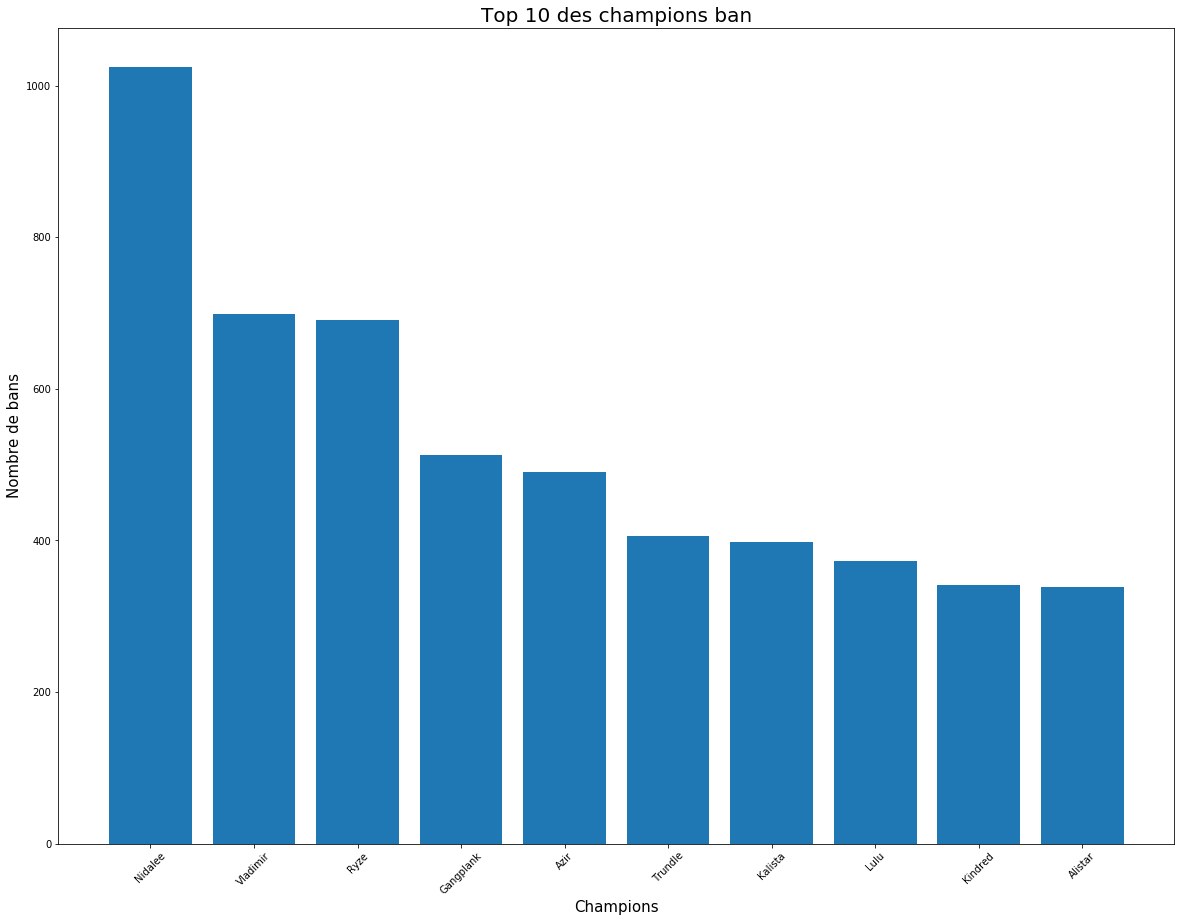

In [8]:
plt.figure(figsize=(20,15))
plt.title("Top 10 des champions ban", fontsize=20)
plt.xlabel("Champions", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Nombre de bans", fontsize=15)

df_tempo1 = df_bans[(df_bans.Date > "2016/1/28") & (df_bans.Date < "2016/10/5")]


test = pd.DataFrame(df_tempo1.Champions.value_counts())

tt = test.sort_values(by="Champions", ascending=False).head(10)

plt.bar(tt.index,tt.Champions)


plt.show()

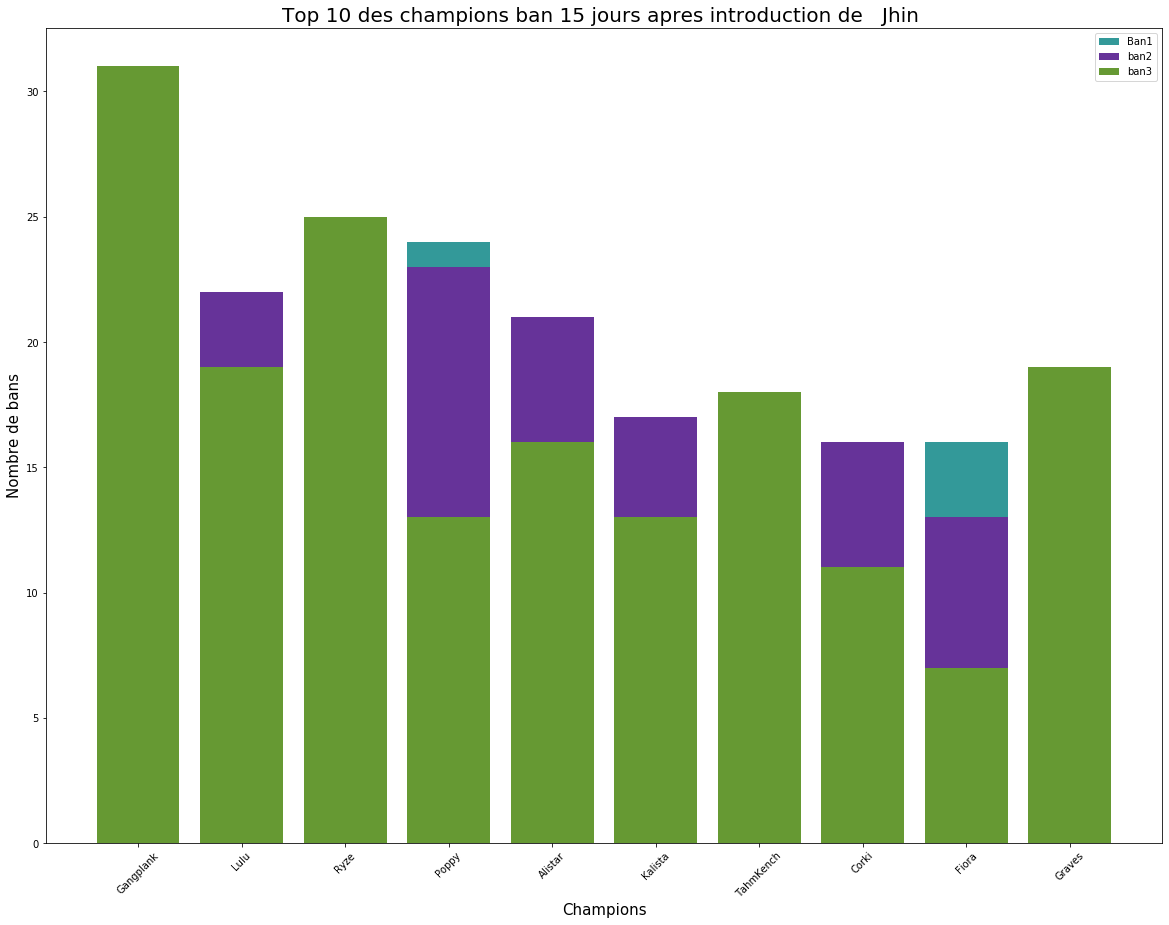

In [9]:
df_tt = df_bans[(df_bans.Date > "2016/1/28") & (df_bans.Date < "2016/2/12")]

df_pv1 = pd.pivot_table(data=df_tt, index="Champions",columns= "ban_pos",values="TeamBan",  aggfunc="count")
df_pv1 = df_pv1.fillna(0)
df_pv1["ban_total"] = df_pv1.ban_1 + df_pv1.ban_2 + df_pv1.ban_3 #+ df_pv1.ban_4 + df_pv1.ban_5

tt =  df_pv1.sort_values(by="ban_total", ascending=False).head(10)

df_ban1 = tt.ban_1.reset_index()
df_ban2 = tt.ban_2.reset_index()
df_ban3 = tt.ban_3.reset_index()
# df_ban4 = tt.ban_4.reset_index()
# df_ban5 = tt.ban_5.reset_index()


plt.figure(figsize=(20,15))
plt.title("Top 10 des champions ban 15 jours apres introduction de {}".format(df_patchNotes[df_patchNotes.Date == "January 28 2016 "].NvxPersonnage.values[0]), fontsize=20)
plt.xlabel("Champions", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Nombre de bans", fontsize=15)


plt.bar(df_ban1.Champions,df_ban1.ban_1, color="#339999")
plt.bar(df_ban2.Champions,df_ban2.ban_2, color="#663399")
plt.bar(df_ban3.Champions,df_ban3.ban_3, color="#669933")
# plt.bar(df_ban4.Champions,df_ban4.ban_4, color="#996633")
# plt.bar(df_ban5.Champions,df_ban5.ban_5, color="#993333")
plt.legend(["Ban1","ban2","ban3"])
plt.show()

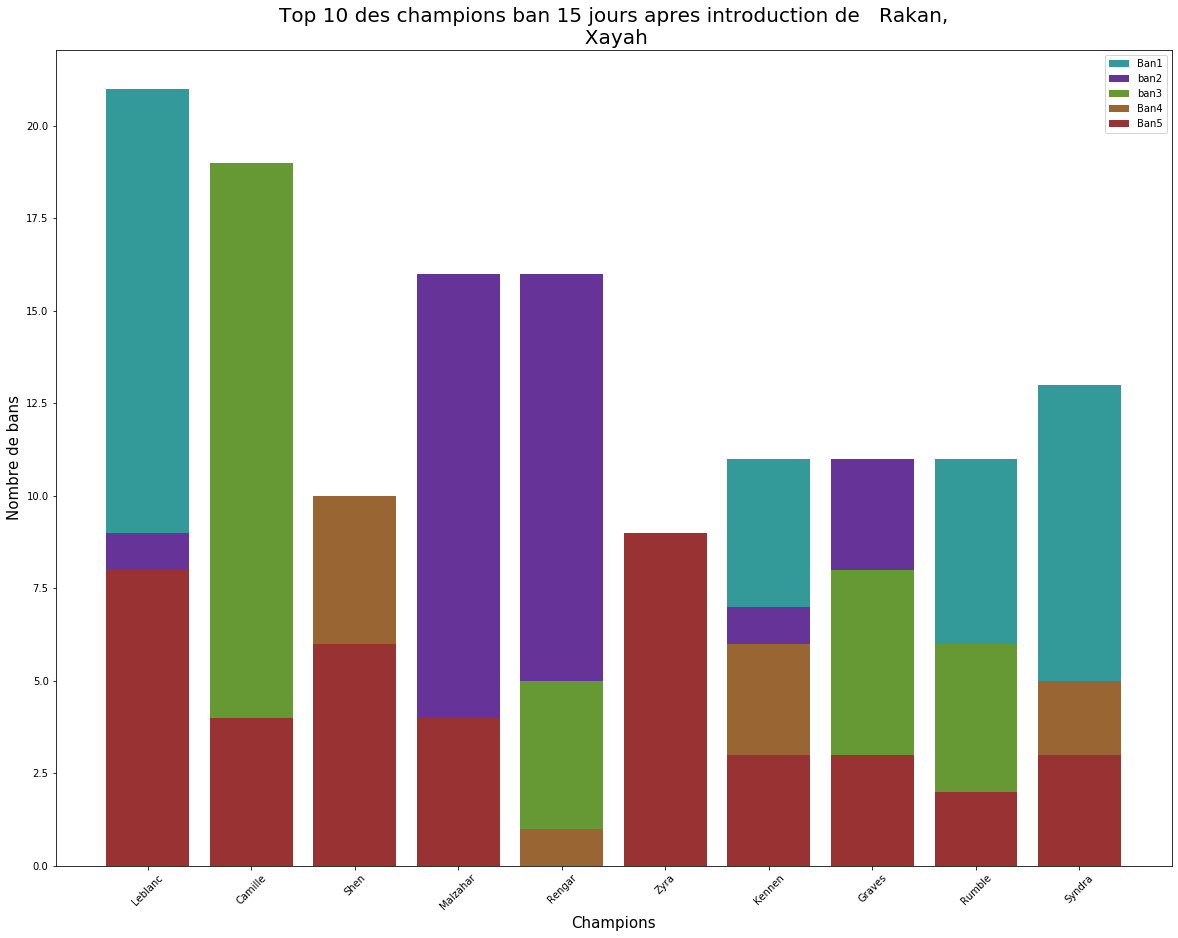

In [10]:
date_patch = "April 19 2017"

df_tt = df_bans[(df_bans.Date > "2017/4/19") & (df_bans.Date < "2017/5/3")]

df_pv1 = pd.pivot_table(data=df_tt, index="Champions",columns= "ban_pos",values="TeamBan",  aggfunc="count")
df_pv1 = df_pv1.fillna(0)
df_pv1["ban_total"] = df_pv1.ban_1 + df_pv1.ban_2 + df_pv1.ban_3 + df_pv1.ban_4 + df_pv1.ban_5

tt =  df_pv1.sort_values(by="ban_total", ascending=False).head(10)

df_ban1 = tt.ban_1.reset_index()
df_ban2 = tt.ban_2.reset_index()
df_ban3 = tt.ban_3.reset_index()
df_ban4 = tt.ban_4.reset_index()
df_ban5 = tt.ban_5.reset_index()


plt.figure(figsize=(20,15))
plt.title("Top 10 des champions ban 15 jours apres introduction de {}".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]), fontsize=20)
plt.xlabel("Champions", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Nombre de bans", fontsize=15)


plt.bar(df_ban1.Champions,df_ban1.ban_1, color="#339999")
plt.bar(df_ban2.Champions,df_ban2.ban_2, color="#663399")
plt.bar(df_ban3.Champions,df_ban3.ban_3, color="#669933")
plt.bar(df_ban4.Champions,df_ban4.ban_4, color="#996633")
plt.bar(df_ban5.Champions,df_ban5.ban_5, color="#993333")
plt.legend(["Ban1","ban2","ban3",'Ban4',"Ban5"])
plt.show()



In [11]:
df_patchNotes[df_patchNotes.Date == "January 28 2016 "].NvxPersonnage.values[0]

'  Jhin '

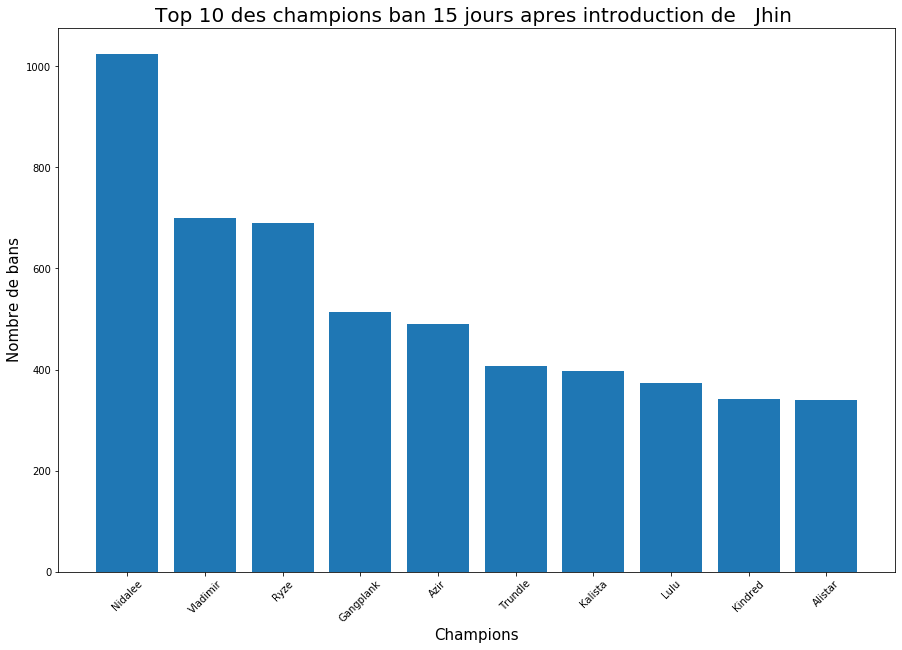

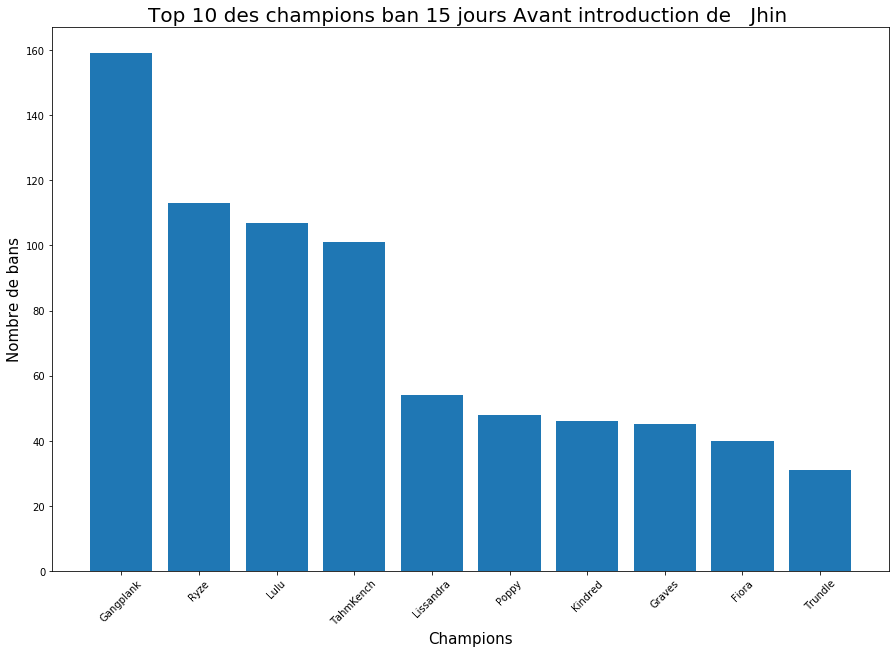

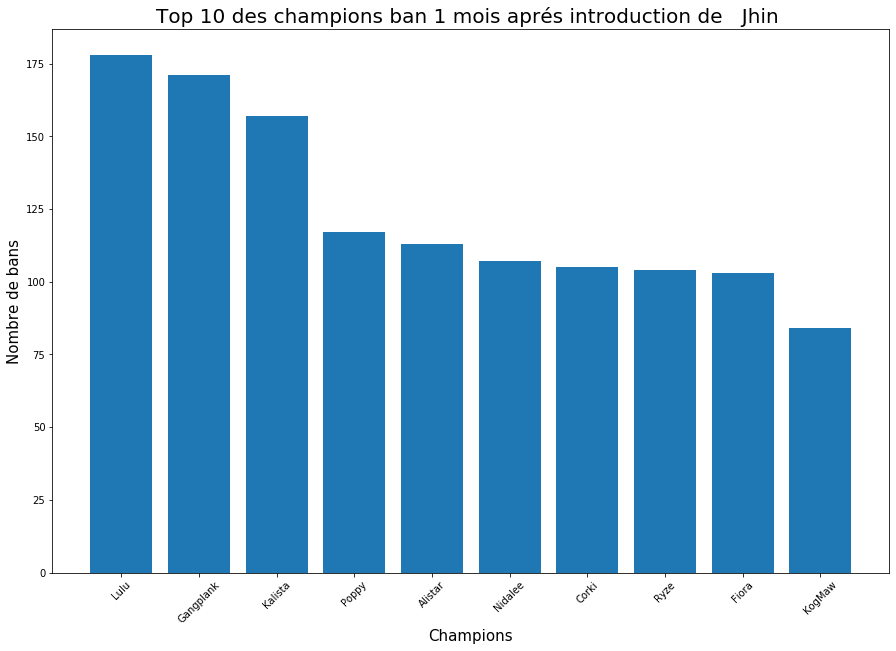

In [12]:
date_patch = "January 28 2016 "

plt.figure(figsize=(15,10))
plt.title("Top 10 des champions ban 15 jours apres introduction de {}".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]), fontsize=20)
plt.xlabel("Champions", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Nombre de bans", fontsize=15)

df_tempo1 = df_bans[(df_bans.Date > "2016/1/28") & (df_bans.Date < "2016/10/5")]

test = pd.DataFrame(df_tempo1.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False).head(10)
plt.bar(tt.index,tt.Champions)


plt.figure(figsize=(15,10))
plt.title("Top 10 des champions ban 15 jours Avant introduction de {}".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]), fontsize=20)
plt.xlabel("Champions", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Nombre de bans", fontsize=15)

df_tempo2 = df_bans[(df_bans.Date < "2016/1/28") & (df_bans.Date > "2016/1/13")]

test = pd.DataFrame(df_tempo2.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False).head(10)
plt.bar(tt.index,tt.Champions)


plt.figure(figsize=(15,10))
plt.title("Top 10 des champions ban 1 mois aprés introduction de {}".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]), fontsize=20)
plt.xlabel("Champions", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Nombre de bans", fontsize=15)

df_tempo3 = df_bans[(df_bans.Date > "2016/1/28") & (df_bans.Date < "2016/2/28")]

test = pd.DataFrame(df_tempo3.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False).head(10)
plt.bar(tt.index,tt.Champions)

plt.show()

In [13]:
df_patchNotes[df_patchNotes.Date == "January 28 2016 "]

,Date,Version,NvxPersonnage,Other,Rework
58,January 28 2016,V6.2,Jhin,NaN,NaN


In [14]:

date_patch = "January 28 2016 "
date = "2016/1/28"
dateplus = "2016/2/12"
datemoins = "2016/1/13"
dateplusmois = "2016/2/28"
champAjout = "Jhin"

print(" ----------- Top 10 des champions ban 15 jours apres introduction de {} ----------- ".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]))

df_tempo1 = df_bans[(df_bans.Date > date) & (df_bans.Date < dateplus)]
test = pd.DataFrame(df_tempo1.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False)
tt = tt.reset_index()
tt = tt.reset_index()

tt.columns = ["Place",'Champions','NombrePick']
tt.Place = tt.Place+1

print(tt.head(15))
print(" ----------- Place champions ajouter  ----------- ")
print(tt[tt.Champions == champAjout])



print(" ----------- Top 10 des champions ban 15 jours Avant introduction de {} ----------- ".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]))

df_tempo2 = df_bans[(df_bans.Date < date) & (df_bans.Date > datemoins)]
test = pd.DataFrame(df_tempo2.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False)
tt = tt.reset_index()
tt = tt.reset_index()

tt.columns = ["Place",'Champions','NombrePick']
tt.Place = tt.Place+1

print(tt.head(15))
print(" ----------- Place champions ajouter  ----------- ")
print(tt[tt.Champions == champAjout])


print(" ----------- Top 10 des champions ban 1 mois aprés introduction de {} ----------- ".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]))

df_tempo3 = df_bans[(df_bans.Date > date) & (df_bans.Date < dateplusmois)]
test = pd.DataFrame(df_tempo3.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False)
tt = tt.reset_index()
tt = tt.reset_index()

tt.columns = ["Place",'Champions','NombrePick']
tt.Place = tt.Place+1


print(tt.head(15))
print(" ----------- Place champions ajouter  ----------- ")
print(tt[tt.Champions == champAjout])


 ----------- Top 10 des champions ban 15 jours apres introduction de   Jhin  ----------- 
    Place  Champions  NombrePick
0       1  Gangplank          82
1       2       Lulu          61
2       3       Ryze          61
3       4      Poppy          60
4       5    Alistar          50
5       6    Kalista          46
6       7  TahmKench          44
7       8      Corki          41
8       9      Fiora          36
9      10     Graves          34
10     11  Lissandra          27
11     12    Nidalee          26
12     13      Quinn          23
13     14      Elise          18
14     15     RekSai          12
 ----------- Place champions ajouter  ----------- 
Empty DataFrame
Columns: [Place, Champions, NombrePick]
Index: []
 ----------- Top 10 des champions ban 15 jours Avant introduction de   Jhin  ----------- 
    Place    Champions  NombrePick
0       1    Gangplank         159
1       2         Ryze         113
2       3         Lulu         107
3       4    TahmKench         101


In [40]:
df_patchNotes[~df_patchNotes.Rework.isna()]

,Date,Version,NvxPersonnage,Other,Rework
1,September 25 2014,V4.17,NaN,NaN,Soraka and Viktor reworks
5,July 30 2014,V4.13,NaN,NaN,Sona rework
13,April 3 2014,V4.5,NaN,Wriggle's Lantern upgrade. Feral Flare Ae...,Gragas Miss Fortune and Rengar reworks
14,March 18 2014,V4.4,NaN,NaN,Kassadin rework
16,February 10 2014,V4.2,NaN,NaN,Skarner and Xerath reworks.
35,February 25 2015,V5.4,NaN,NaN,Zilean Veigar and Mordekaiser reworks.
41,September 21 2016,V6.19,NaN,NaN,Kog'Maw rework.
76,March 8 2017,V7.5,NaN,LeBlanc nerf. Reworked Bond of Stone and W...,Aatrox gameplay rework


In [43]:
df_patchNotes.Date.values

array(['October 9 2014  ', 'September 25 2014  ', 'September 10 2014  ',
       'August 27 2014  ', 'August 13 2014  ', 'July 30 2014  ',
       'July 16 2014  ', 'July 2 2014  ', 'June 18 2014  ',
       'June 4 2014 ', 'May 22 2014  ', 'May 8 2014  ', 'April 21 2014  ',
       'April 3 2014  ', 'March 18 2014  ', 'February 27 2014  ',
       'February 10 2014  ', 'January 15 2014  ', 'October 29 2015  ',
       'October 14 2015  ', 'September 30 2015  ', 'September 16 2015  ',
       'September 2 2015  ', 'August 20 2015  ', 'August 5 2015  ',
       'July 22 2015  ', 'July 8 2015  ', 'June 242015  ',
       'June 10 2015  ', 'May 28 2015  ', 'May 142015  ',
       'April 28 2015  ', 'April 8 2015  ', 'March 25 2015  ',
       'March 12 2015  ', 'February 25 2015  ', 'February 11 2015  ',
       'January 28 2015  ', 'January 15 2015  ', 'October 19 2016',
       'October 5 2016', 'September 21 2016', 'September 8 2016',
       'August 24 2016', 'August 10 2016 ', 'July 26 2016',
    

In [44]:
df_patchNotes[df_patchNotes.Date == "September 21 2016"]

,Date,Version,NvxPersonnage,Other,Rework
41,September 21 2016,V6.19,NaN,NaN,Kog'Maw rework.


In [47]:
df_patchNotes[df_patchNotes.Date.isin(['October 19 2016','October 5 2016'])]

,Date,Version,NvxPersonnage,Other,Rework
39,October 19 2016,V6.21,NaN,Kog'Maw ultimate changes,NaN
40,October 5 2016,V6.20,Ivern,NaN,NaN


In [27]:

date_patch = "September 21 2016"
date = "2016/9/21"
dateplus = "2016/10/5"
datemoins = "2016/8/28"
dateplusmois = "2016/10/21"
champAjout = "KogMaw"

print(" ----------- Top 10 des champions ban 15 jours apres Rework de {} ----------- ".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]))

df_tempo1 = df_bans[(df_bans.Date > date) & (df_bans.Date < dateplus)]
test = pd.DataFrame(df_tempo1.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False)
tt = tt.reset_index()
tt = tt.reset_index()

tt.columns = ["Place",'Champions','NombrePick']
tt.Place = tt.Place+1

print(tt.head(15))
print(" ----------- Place champions ajouter  ----------- ")
print(tt[tt.Champions == champAjout])



print(" ----------- Top 10 des champions ban 15 jours Avant Rework de {} ----------- ".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]))

df_tempo2 = df_bans[(df_bans.Date < date) & (df_bans.Date > datemoins)]
test = pd.DataFrame(df_tempo2.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False)
tt = tt.reset_index()
tt = tt.reset_index()

tt.columns = ["Place",'Champions','NombrePick']
tt.Place = tt.Place+1

print(tt.head(15))
print(" ----------- Place champions ajouter  ----------- ")
print(tt[tt.Champions == champAjout])


print(" ----------- Top 10 des champions ban 1 mois aprés Rework de {} ----------- ".format(df_patchNotes[df_patchNotes.Date == date_patch].NvxPersonnage.values[0]))

df_tempo3 = df_bans[(df_bans.Date > date) & (df_bans.Date < dateplusmois)]
test = pd.DataFrame(df_tempo3.Champions.value_counts())
tt = test.sort_values(by="Champions", ascending=False)
tt = tt.reset_index()
tt = tt.reset_index()

tt.columns = ["Place",'Champions','NombrePick']
tt.Place = tt.Place+1


print(tt.head(15))
print(" ----------- Place champions ajouter  ----------- ")
print(tt[tt.Champions == champAjout])


 ----------- Top 10 des champions ban 15 jours apres Rework de nan ----------- 
    Place    Champions  NombrePick
0       1      Nidalee          18
1       2       Syndra          16
2       3       RekSai          13
3       4        Elise          10
4       5         Gnar           7
5       6     Vladimir           7
6       7         Olaf           6
7       8        Karma           6
8       9        Sivir           6
9      10        Jayce           5
10     11          Zac           4
11     12    TahmKench           4
12     13       Ezreal           4
13     14  TwistedFate           4
14     15       Kennen           4
 ----------- Place champions ajouter  ----------- 
Empty DataFrame
Columns: [Place, Champions, NombrePick]
Index: []
 ----------- Top 10 des champions ban 15 jours Avant Rework de nan ----------- 
    Place   Champions  NombrePick
0       1    Vladimir          39
1       2   Gangplank          35
2       3       Karma          31
3       4     Nidalee      

In [23]:
df_bans[df_bans.Champions == "KogMaw"]

,Unnamed: 0,Champions,ban_pos,TeamBan,Date
131,131,KogMaw,ban_1,blueBans,2015-06-22
305,305,KogMaw,ban_1,blueBans,2016-02-27
1225,1225,KogMaw,ban_1,blueBans,2015-06-11
1238,1238,KogMaw,ban_1,blueBans,2015-06-18
1415,1415,KogMaw,ban_1,blueBans,2016-02-19
...,...,...,...,...,...
75651,75651,KogMaw,ban_5,redBans,2018-01-20
75688,75688,KogMaw,ban_5,redBans,2018-01-20
75898,75898,KogMaw,ban_5,redBans,2017-08-11
75982,75982,KogMaw,ban_5,redBans,2017-08-24
